In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

train = pd.read_csv('data/train.csv')
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [2]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [3]:
# 결측치가 있는 row들을 확인합니다.
train[train.isna().sum(axis=1) > 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
15081,15081,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
15082,15082,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
15083,15083,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,1
15084,15084,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
15085,15085,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [4]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native.country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


In [5]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train)       

결측치가 존재하지 않습니다


In [6]:
train['target'] = train['target'].apply(lambda x : '<=50K' if x == 0 else '>50K' )

In [7]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


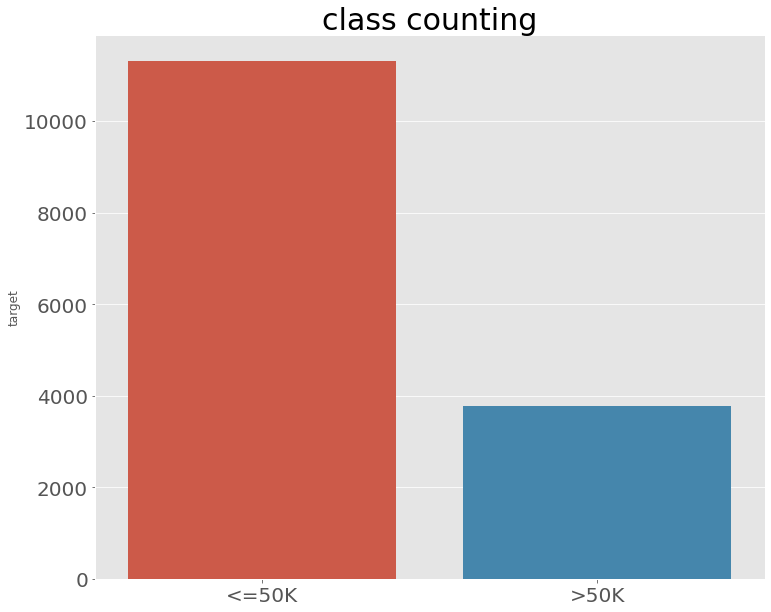

In [8]:
counted_values = train['target'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

In [9]:
train_categori = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop
train_categori.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K


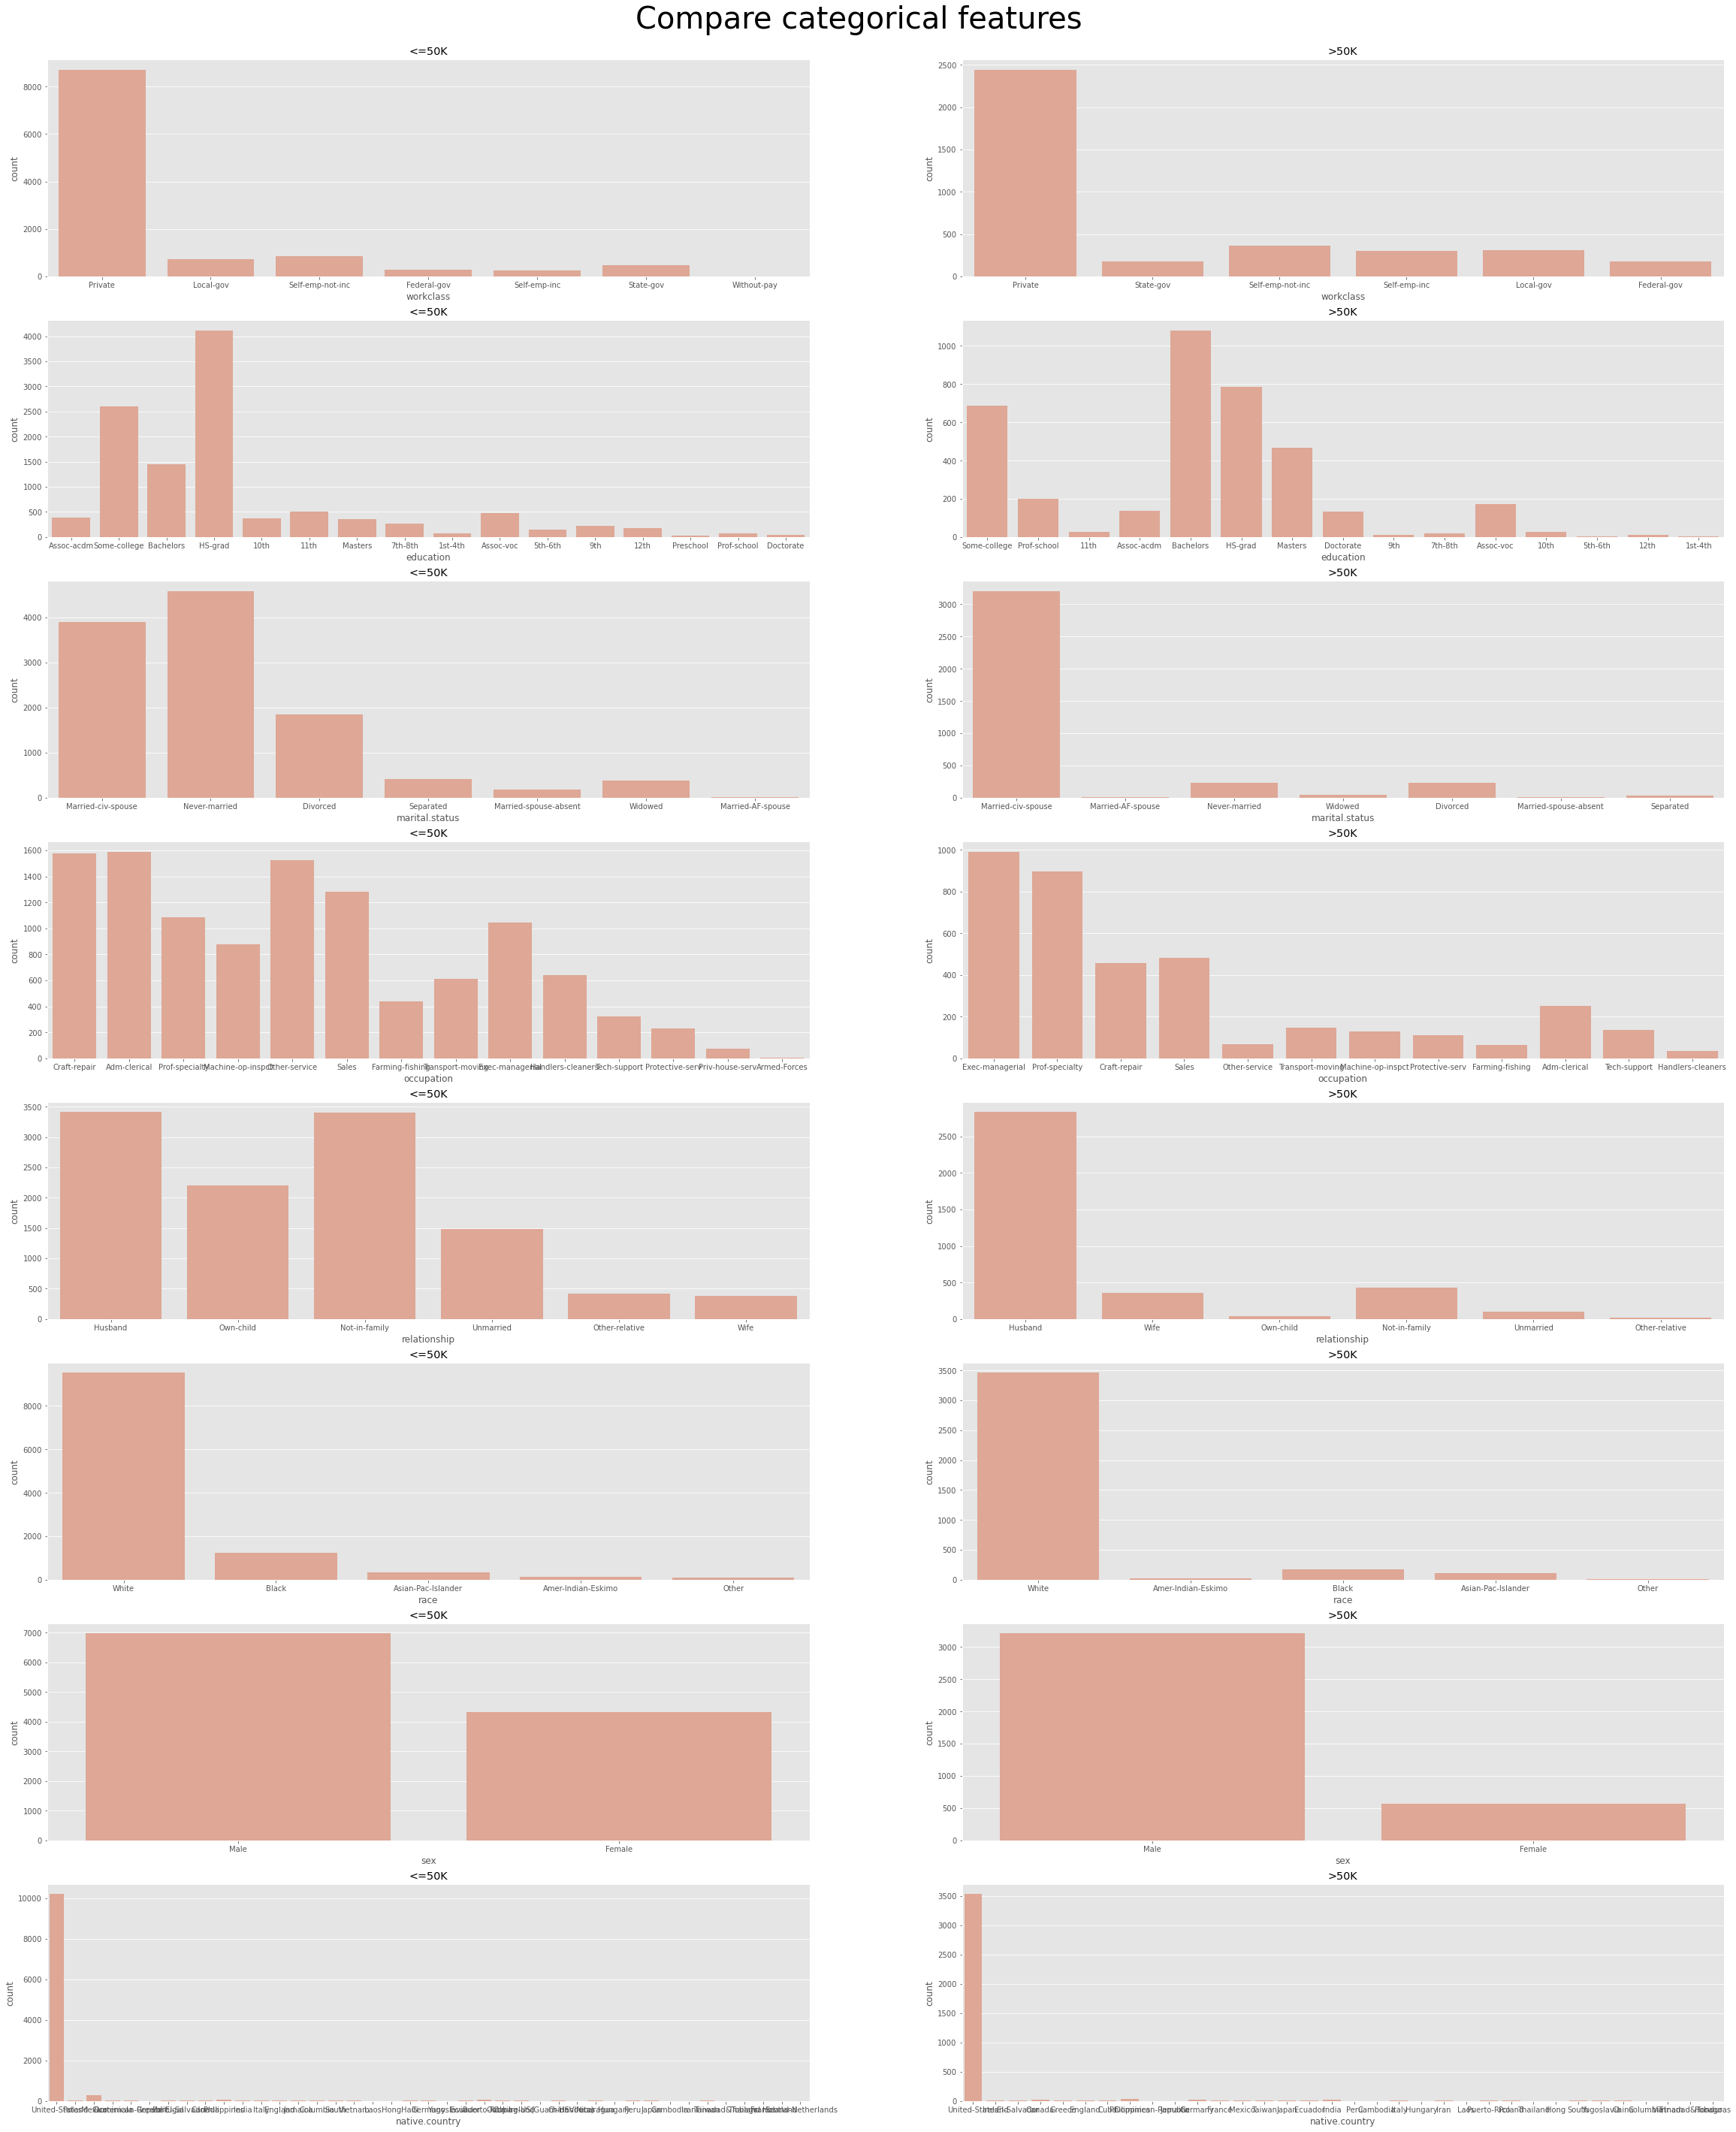

In [10]:
# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_categori.columns[num], data= train_categori[train_categori['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['target'].unique()[i], k)
        j = j+1
    k = k+1

In [11]:
train_numeric = train[['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_numeric.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,target
0,32,309513,0,0,40,<=50K
1,33,205469,0,0,40,>50K
2,46,149949,0,0,40,<=50K
3,23,193090,0,0,30,<=50K
4,55,60193,0,0,40,<=50K


In [12]:
train_numeric.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000
mean,38.455673,1.897891e+05,1105.202772,85.466415,40.920828
std,13.158095,1.051112e+05,7489.760601,397.661418,12.018513
min,17.000000,1.882700e+04,0.000000,0.000000,1.000000
25%,28.000000,1.177460e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,0.000000,0.000000,40.000000
75%,47.000000,2.381880e+05,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,99999.000000,4356.000000,99.000000


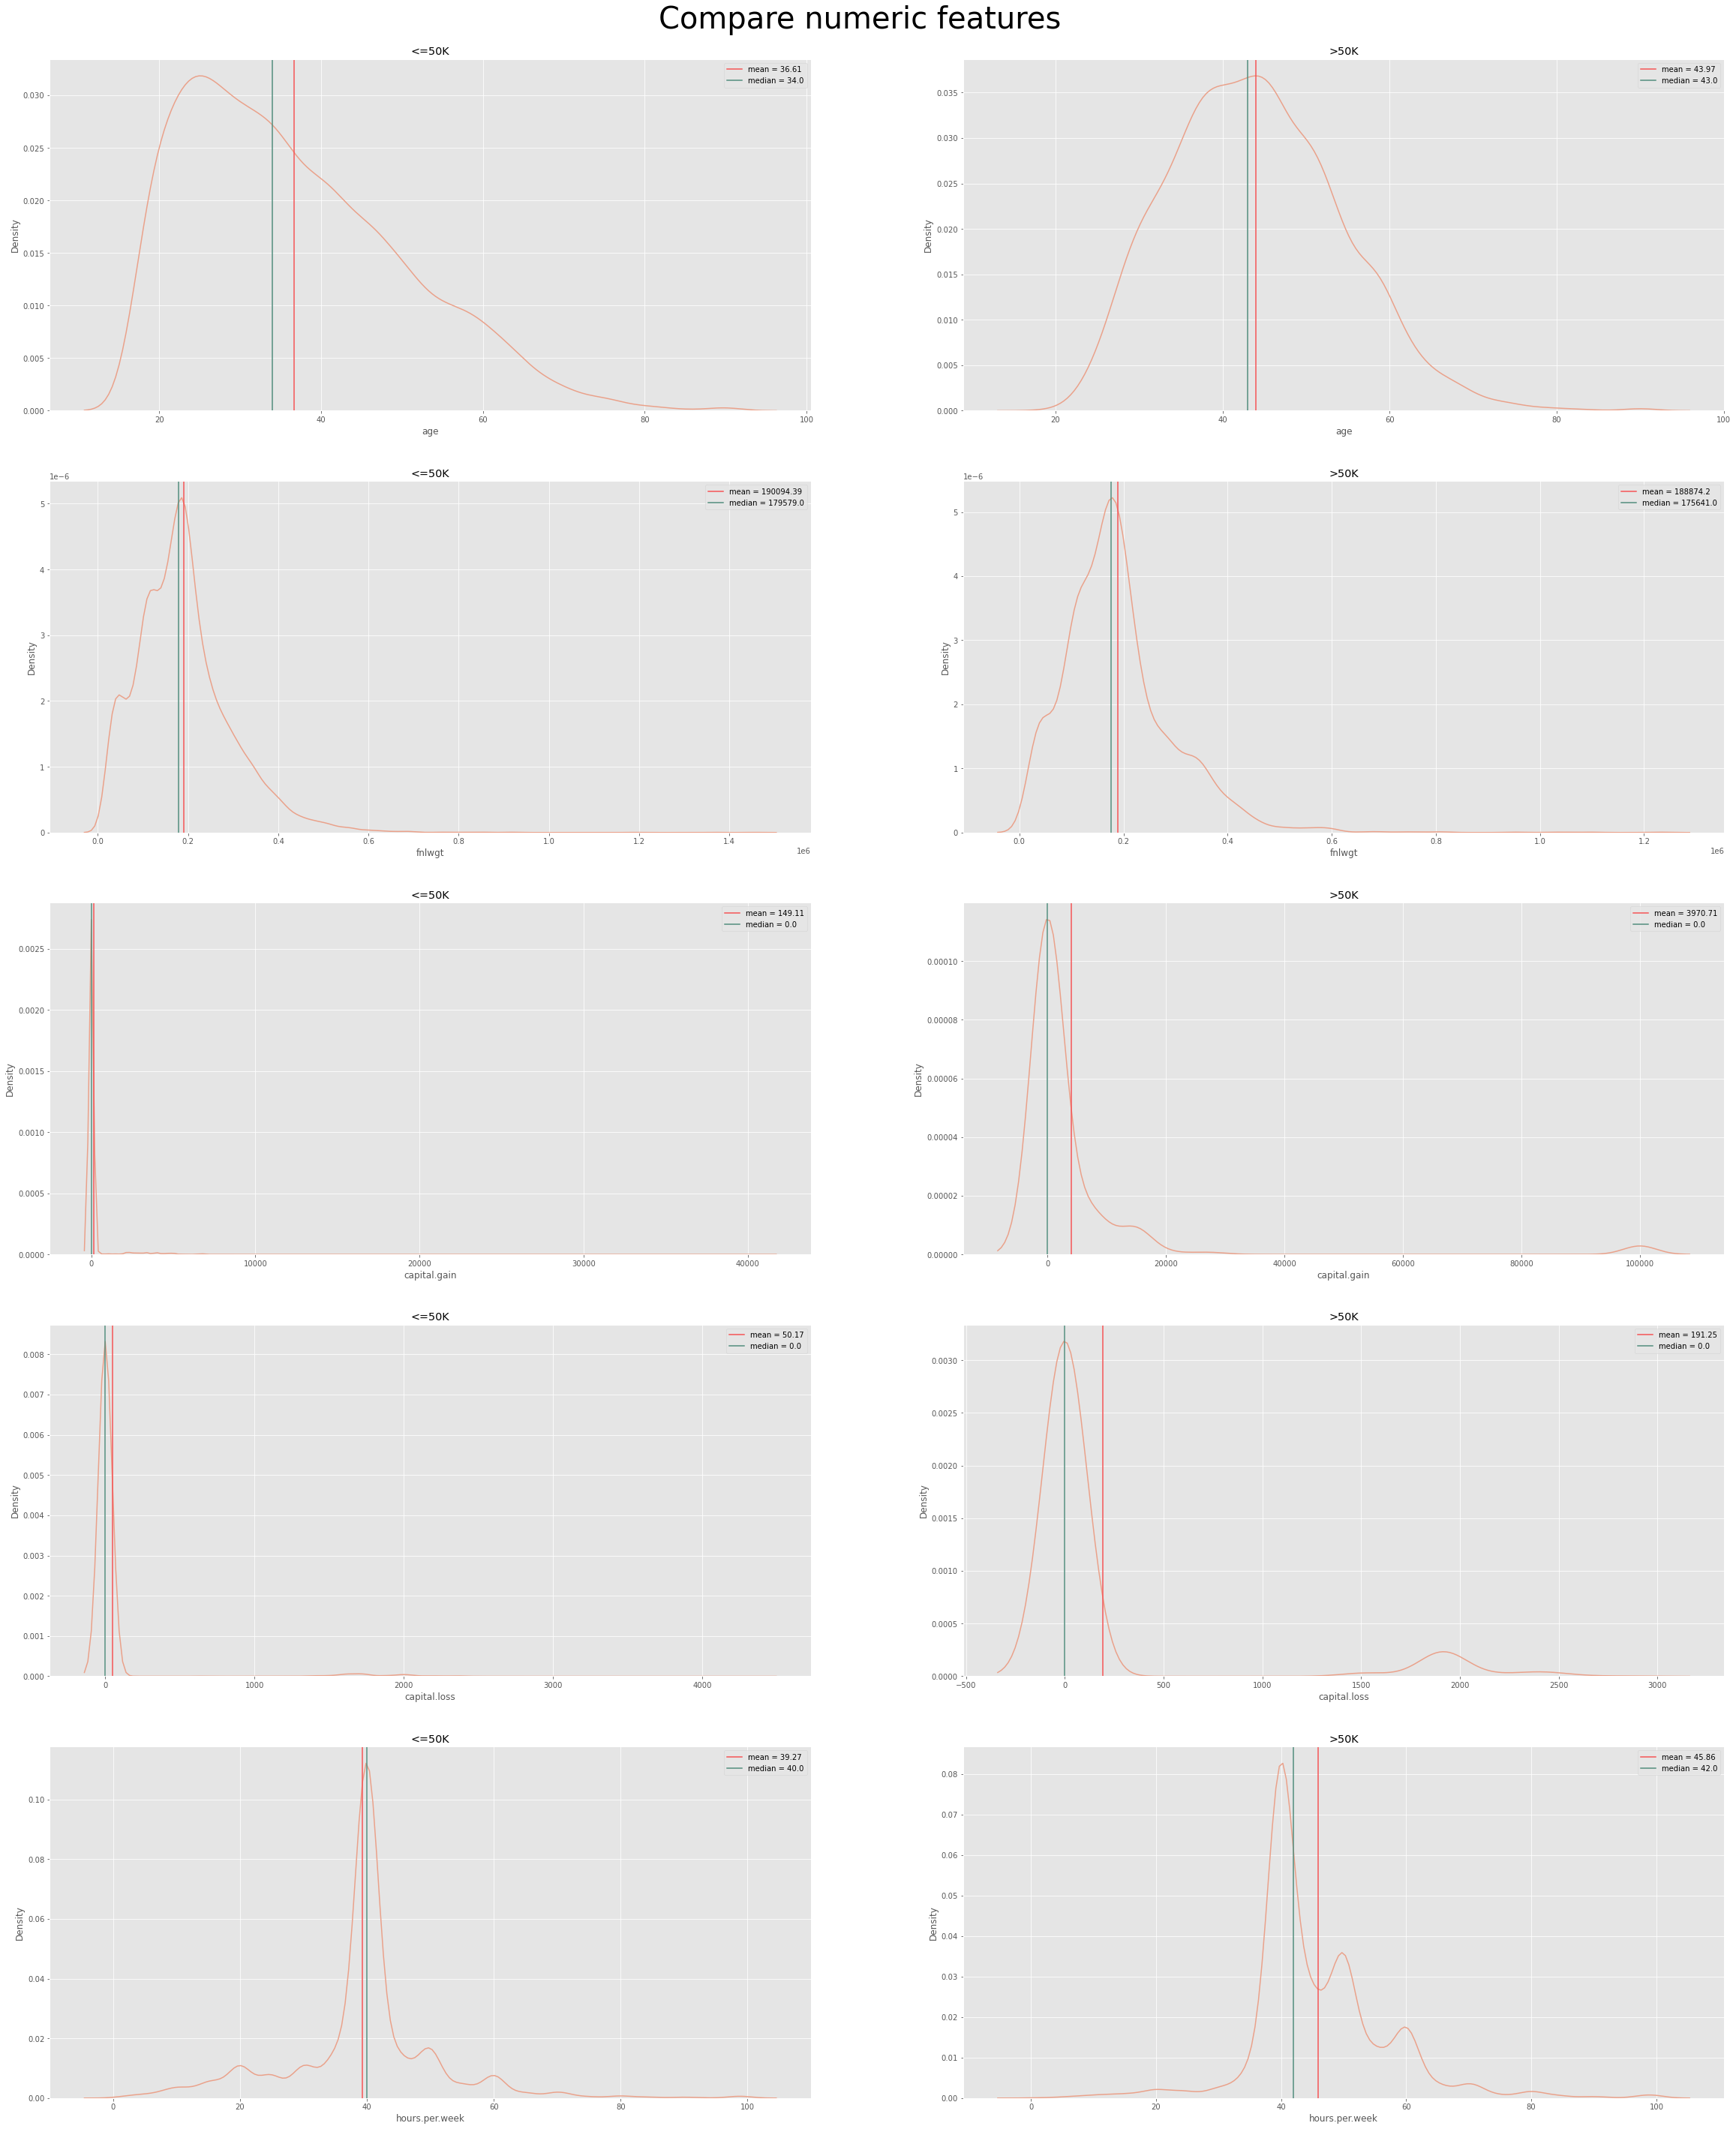

In [13]:
# 수치형 데이터 분포 
def visualize(axx, field, num):
    line = train_numeric[train_numeric['target'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['target'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['target'].unique()[i], k)
        j = j+1
    k = k+1

<AxesSubplot:title={'center':'capital gain and working time'}, xlabel='capital.gain', ylabel='hours.per.week'>

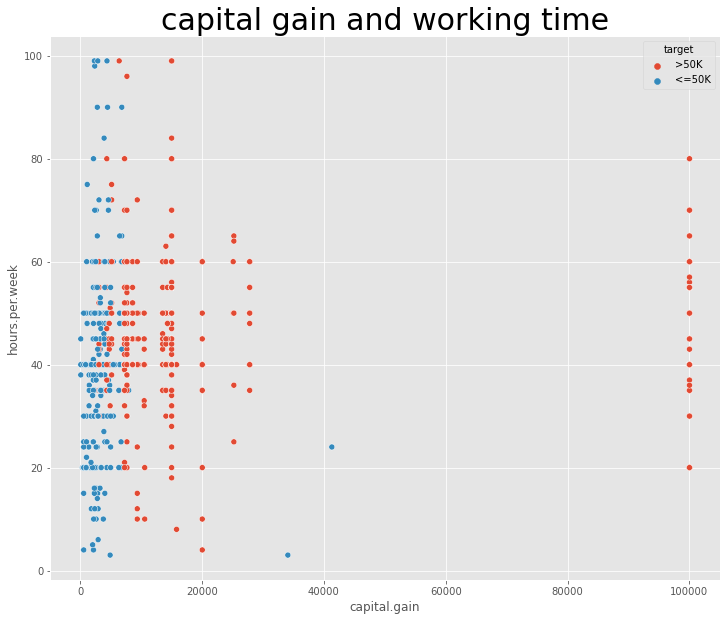

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'capital.gain',  y= 'hours.per.week', hue= 'target', data= train[train['capital.gain'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.gain에서 0값을 제외

<AxesSubplot:title={'center':'capital gain and working time'}, xlabel='age', ylabel='capital.loss'>

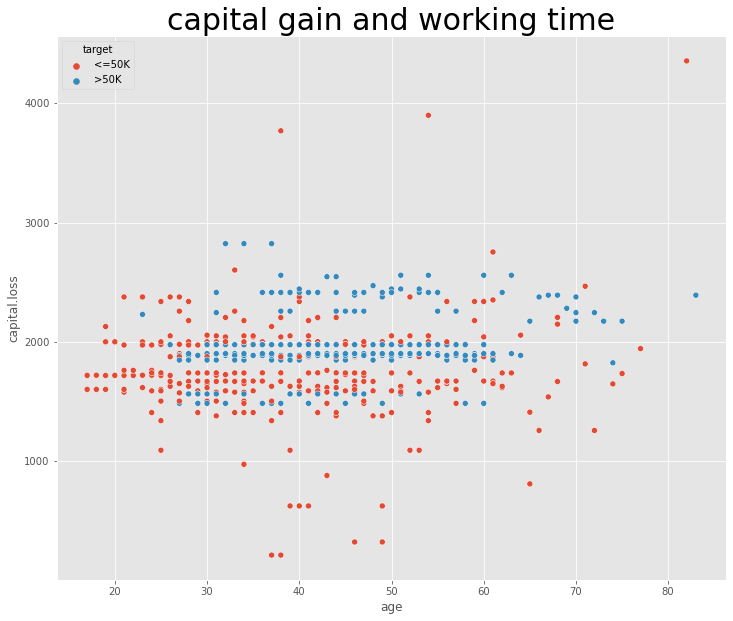

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'age',  y= 'capital.loss', hue= 'target', data= train[train['capital.loss'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.loss에서 0값을 제외